## Laboration Disease prediction
Labben är framtagen för att undersöka förhållanden mellan olika mänskliga parametrar, både fysiologiska faktorer och mänsliga faktorer, för att i slutändan kunna förutspå hjärt-kärlsjukdomar. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Lab import cardiovascular_disease

df = pd.read_csv("Resources\cardio_train.csv", sep=";")
df_copy = df.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# EDA

In [2]:
print("---------- TYPES n SHAPES ----------")
print(df.info())
print("---------- NA VALUES ----------")
print(df.isnull().sum())

---------- TYPES n SHAPES ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
---------- NA VALUES ----------
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0


In [3]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


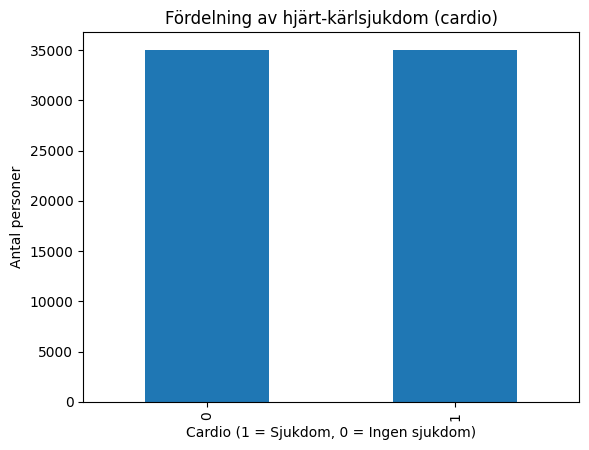

In [5]:
value = df["cardio"].value_counts().plot(kind="bar")
plt.title("Fördelning av hjärt-kärlsjukdom (cardio)")
plt.xlabel("Cardio (1 = Sjukdom, 0 = Ingen sjukdom)")
plt.ylabel("Antal personer")
plt.show()

Datan innehåller testvärden från 70k individer och visa en gämn fördelning på hjärt-kärlsjukdomar, vilket indikerar på goda förutsättningar för slutresultatet. 
Fördelningen av kolestrolnivåerna ser rimliga ut, inte helt chokerande på det höga antalet av "Över normal" och "Långt över normal" med tanke på en ökande trend för människans matvanor, nikotin och alkoholintag, detta mest troligt på den ökande åtkomligheten av ohälsosam kost motsvarande. 

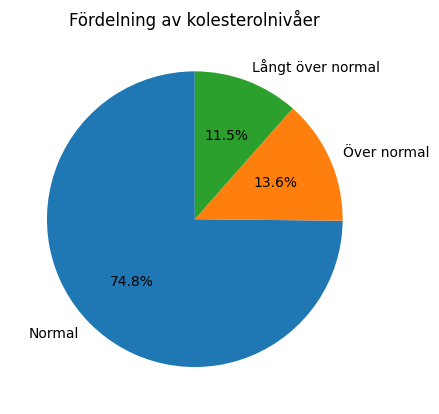

In [6]:
kolestrol_counts = df["cholesterol"].value_counts()
plt.pie(kolestrol_counts, autopct="%1.1f%%", startangle=90, labels=["Normal", "Över normal", "Långt över normal"])
plt.title("Fördelning av kolesterolnivåer")
plt.show()

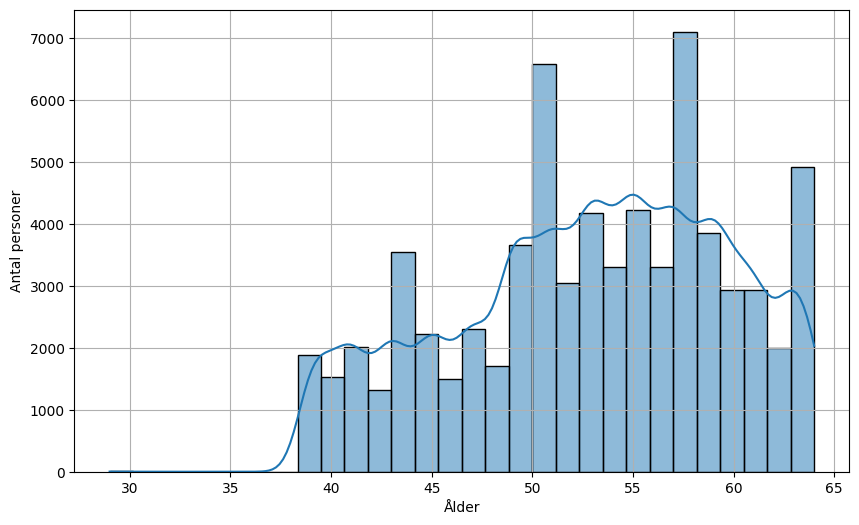

In [7]:
df["age"] = (df["age"]/365.25).astype(int)

plt.figure(figsize=(10, 6))
plt.grid(True)
sns.histplot(df["age"], kde=True, bins=30);
plt.xlabel("Ålder")
plt.ylabel("Antal personer")
plt.show()

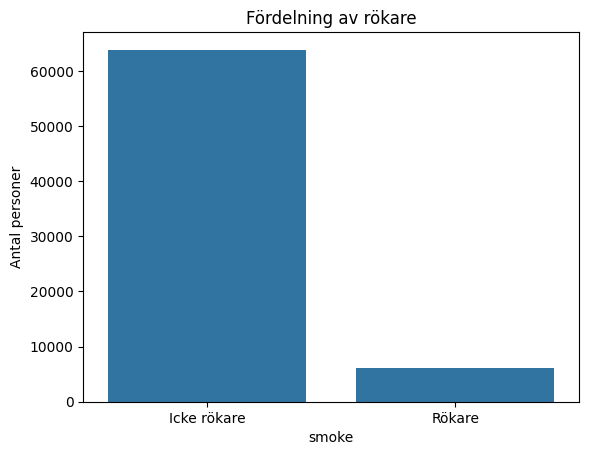

In [8]:
sns.countplot(x="smoke", data=df)
plt.title("Fördelning av rökare")
plt.ylabel("Antal personer")
plt.xticks(ticks=[0, 1], labels=["Icke rökare", "Rökare"])
plt.show()

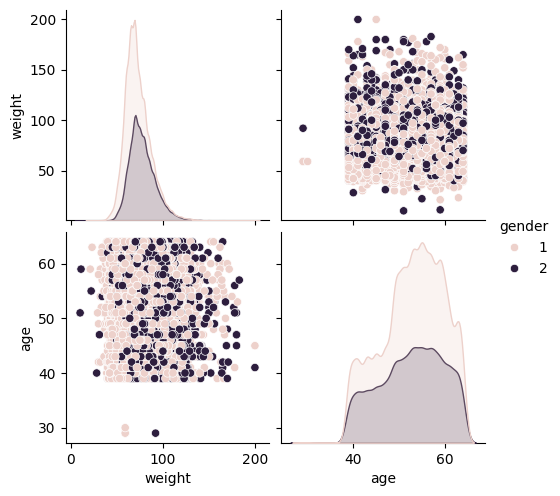

In [9]:
df_weight = df[["weight", "age", "gender"]]
sns.pairplot(df_weight, hue="gender");

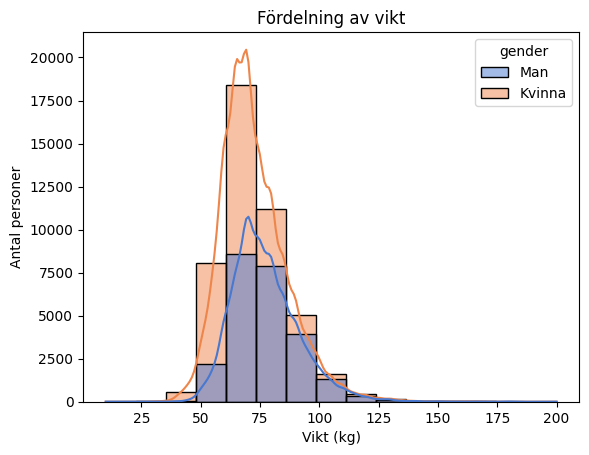

In [10]:
df["gender"] = df["gender"].replace({1: "Kvinna", 2: "Man"})

sns.histplot(x=df["weight"], hue=df["gender"], kde=True, bins=15, palette="muted", legend=True);
plt.title("Fördelning av vikt")
plt.xlabel("Vikt (kg)")
plt.ylabel("Antal personer")
plt.show()

Datan visar förhållanderna på vikten i KG och nedan längden i CM mellan män och kvinnor. Utöver att grafen avslöjar att kvinnor är överrepresenterade i datan, bevisar viktgrafen också att vikten är jämnt fördelad mellan könen vilket inte höjer några ögon. Längdgrafen nedan däremot, visar tydligt att män är överrepresenterande för högre längder. Sammantaget uppdagar datan ett högre BMI för kvinnor kontra män.

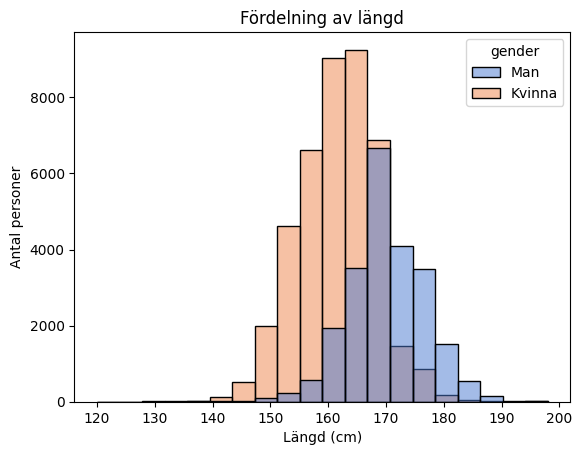

In [30]:
sns.histplot(x=df["height"], hue=df["gender"], bins=20, palette="muted", legend=True);
plt.title("Fördelning av längd")
plt.xlabel("Längd (cm)")
plt.ylabel("Antal personer")
plt.show()

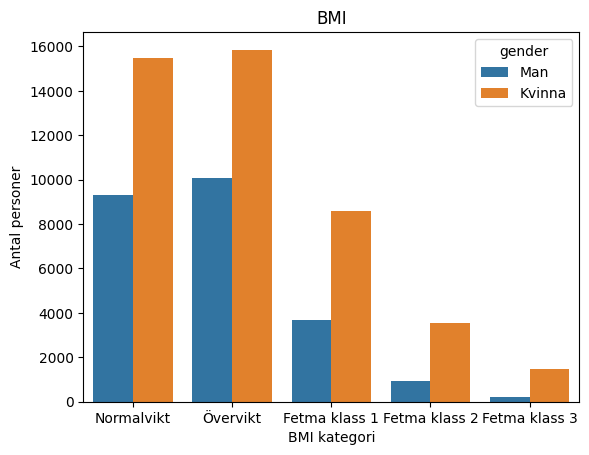

In [12]:
bmi = df["weight"] / ((df["height"] / 100)**2)
df.loc[:,"bmi"] = bmi
df = df[(df["bmi"] <= 50) & (df["bmi"] >= 18.5)]
df["bmi_kategori"] = pd.cut(df["bmi"], bins=[18.5, 24.9, 29.9, 34.9, 39.9, 50], labels=["Normalvikt", "Övervikt", "Fetma klass 1", "Fetma klass 2", "Fetma klass 3"]) # Inspo https://www.geeksforgeeks.org/classifying-data-with-pandas-in-python/
sns.countplot(data=df, x="bmi_kategori", hue="gender")
plt.title("BMI")
plt.xlabel("BMI kategori")
plt.ylabel("Antal personer")
plt.show()

BMI räknas ut på vikten och höjden med formel: $$BMI = \frac{\text{Vikt (kg)}}{\left(\text{Längd (m)}\right)^2}$$
BMI klassernas intervaller är framtagna från Wikipedia och delas in med pandas cut verktyg. 
Som förutspått visar grafen utöver fler andel kvinnor i datan, fördelningen av BMI klasserna. 

Nedan visas BMI klasserna i en boxplot per kön och hjärt-kärlsjukdomar. Ploten avslöjar en del outliers som representerar värden som avviker från det typiska mönstret i datan. Dock är det betydelsefull data med tanke på hur katergorigränserna är satta för de övrer BMI klasserna. 
|Viktklasser|BMI|
|-----------|---|
|Normalvikt |18.5-25|
|Övervikt|26-30|
|Fetma klass 1|31-35|
|Fetma klass 2|36-40|
|Fetma klass 3|40+|

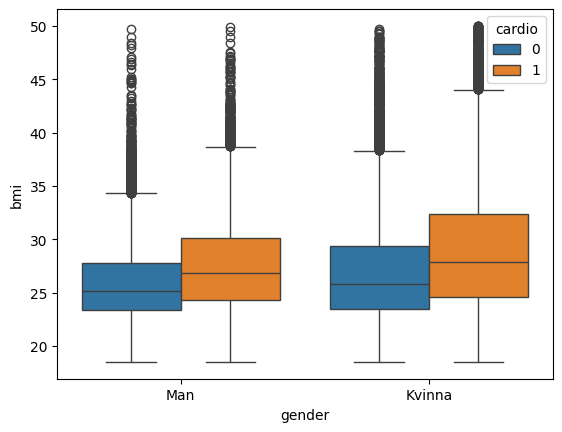

In [13]:
sns.boxplot(x="gender", y="bmi", hue="cardio", data=df);

In [14]:
df = df[(df["ap_hi"] >= 100) & (df["ap_hi"] <= 190) & (df["ap_lo"] >= 70) & (df["ap_lo"] <= 130)]
cvd = cardiovascular_disease(df)
df = cvd.categorize_bp()

bp_group = df.groupby("bp_category")["bmi_kategori"].value_counts()
chol_group = df.groupby("cholesterol")["bmi_kategori"].value_counts()
bp_group

bp_category       bmi_kategori 
Frisk             Normalvikt        3354
                  Övervikt          2406
                  Fetma klass 1      876
                  Fetma klass 2      207
                  Fetma klass 3       59
Förhöjt           Normalvikt       12183
                  Övervikt         10871
                  Fetma klass 1     3912
                  Fetma klass 2     1206
                  Fetma klass 3      377
Hypertoni grad 1  Övervikt          5733
                  Normalvikt        4123
                  Fetma klass 1     3200
                  Fetma klass 2     1247
                  Fetma klass 3      468
Hypertoni grad 2  Övervikt          5304
                  Fetma klass 1     3636
                  Normalvikt        3102
                  Fetma klass 2     1536
                  Fetma klass 3      649
Hypertoni kris    Fetma klass 1       21
                  Övervikt            15
                  Normalvikt          13
                  Fetma k

I datan finns värden på atreriellt tryck som kan sammanställas för att klassifiera blodtrycks klasser. Över tabell visar antalet individer med olika blodtryck och BMI klasser. Majoriteten verkar i spannet på förhöjt blodtryck och BMI normalvikt till övervikt. 

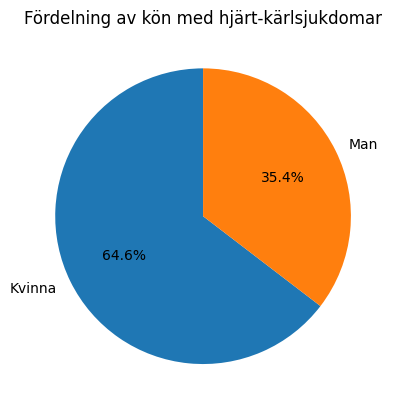

In [15]:
kolestrol_counts = df[df["cardio"] == 1]["gender"].value_counts()
plt.pie(kolestrol_counts, labels=kolestrol_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Fördelning av kön med hjärt-kärlsjukdomar")
plt.show()

In [16]:
chol_group

cholesterol  bmi_kategori 
1            Normalvikt       18746
             Övervikt         18321
             Fetma klass 1     7672
             Fetma klass 2     2546
             Fetma klass 3      909
2            Övervikt          3344
             Normalvikt        2277
             Fetma klass 1     2025
             Fetma klass 2      774
             Fetma klass 3      297
3            Övervikt          2664
             Fetma klass 1     1948
             Normalvikt        1752
             Fetma klass 2      886
             Fetma klass 3      353
Name: count, dtype: int64

Tabellen ovan visar förhållandet på kolesterol och BMI klasserna. Ett ökat kolesterol värde beror oftast utöver blodtryck på kost, nikotin och fysikt aktiva vanor. Dock visar datan värden av den lägre graden på kolesterol vara överrepresenterad mot alla klasser för BMI. 

Nedan tabell visar tydligt att BMI av högre klass ökar risken att få hjärt-kärlsjukdomar. 

In [17]:
cardio_vs_bmi = df.groupby("cardio")["bmi_kategori"].value_counts()
cardio_vs_bmi

cardio  bmi_kategori 
0       Normalvikt       13464
        Övervikt         11836
        Fetma klass 1     4637
        Fetma klass 2     1351
        Fetma klass 3      482
1       Övervikt         12493
        Normalvikt        9311
        Fetma klass 1     7008
        Fetma klass 2     2855
        Fetma klass 3     1077
Name: count, dtype: int64

In [18]:
smoke_drink = df[ (df["smoke"]== 1) & (df["alco"]== 1) & (df["cardio"] == 1)]
no_smoke_drink = df[ (df["smoke"]== 0) & (df["alco"]== 0) & (df["cardio"] == 0)]

smoke_drink.shape[0], no_smoke_drink.shape[0]

(765, 27993)

c:\Users\emil_\git\Machine-Learning\Lab\Lab.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_cardio = self.df.groupby("bmi_kategori")["cardio"].mean().reset_index()


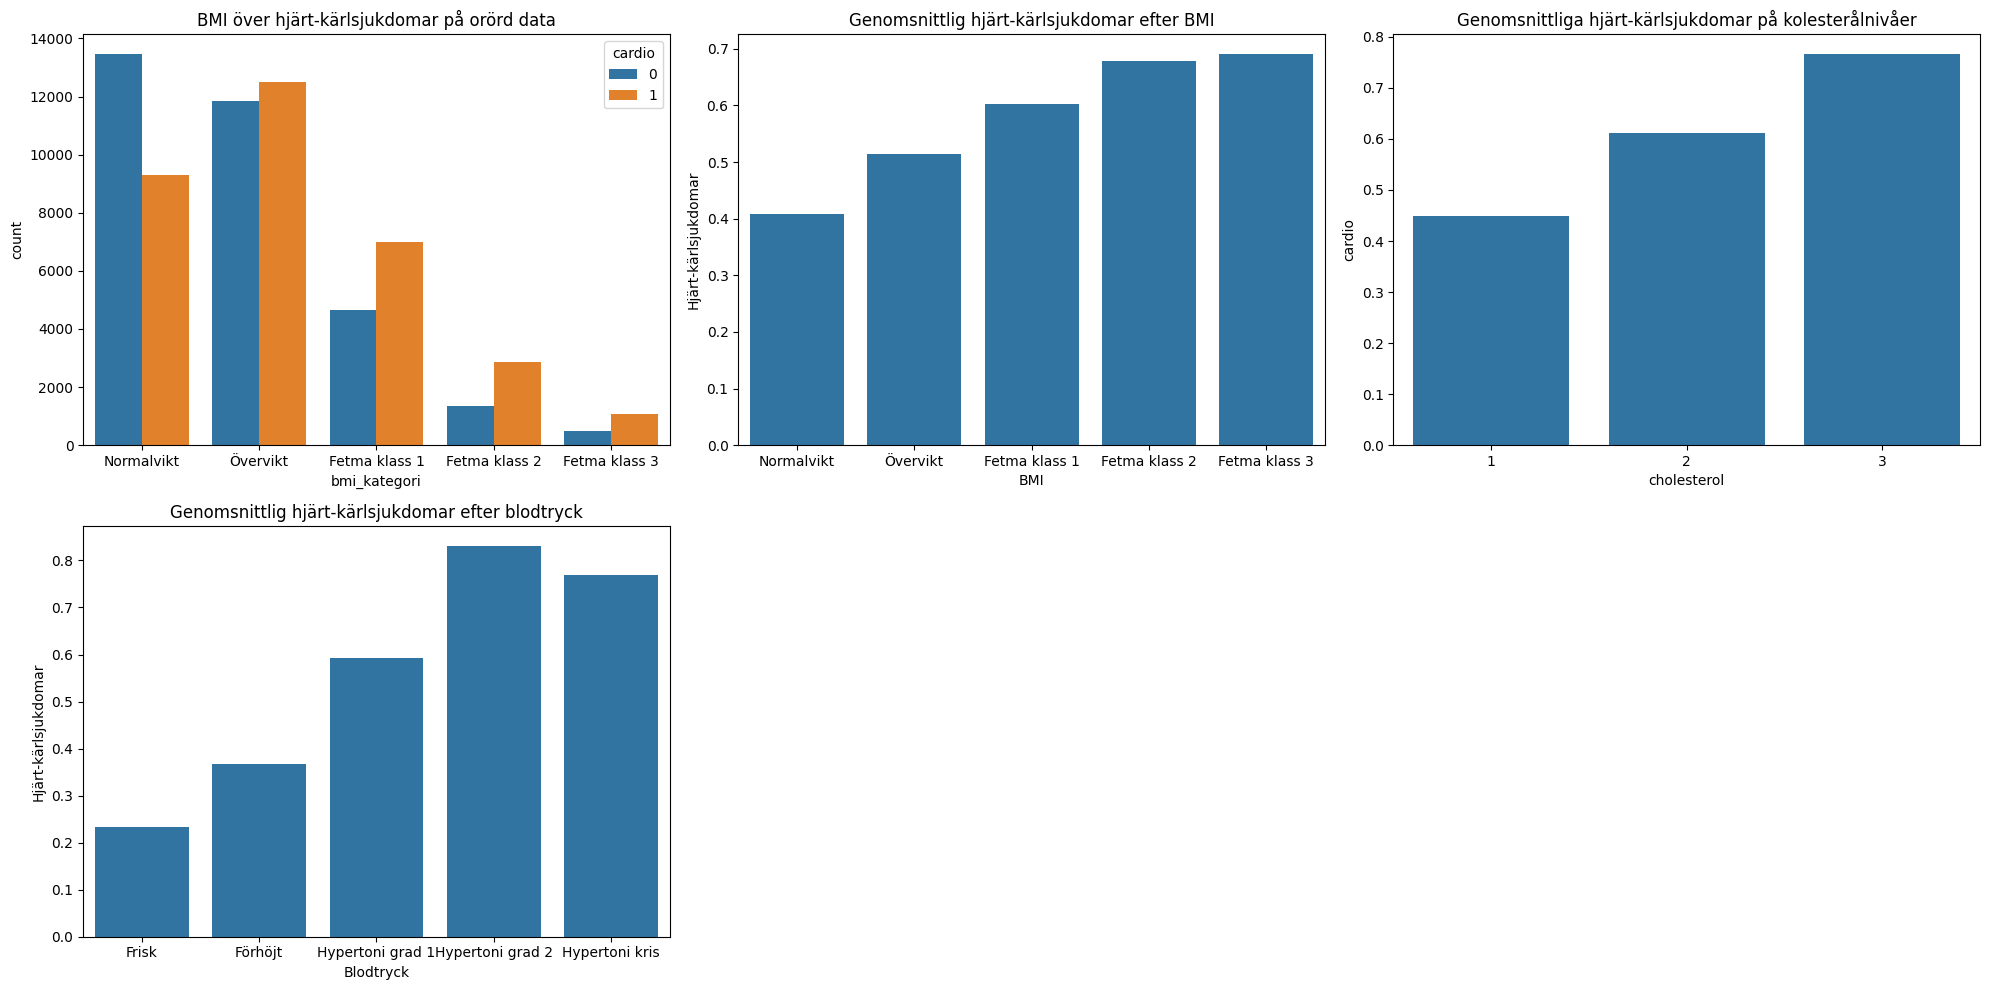

None


In [19]:
print(cvd.subplot())

Stapeldiagrammen, med undantag för det första, representerar genomsnittet av hela datasetet och visar en tydlig korrelation mellan ökade nivåer av BMI, kolesterol och blodtryck med en högre risk för hjärt-kärlsjukdomar. Denna visualisering gör det enkelt att förstå hur olika hälsovariabler samverkar och påverkar risken för allvarliga sjukdomar. Genom att analysera dessa data kan vi dra slutsatsen att individer i högre BMI-klasser, liksom de med förhöjda kolesterol- och blodtrycksnivåer, tenderar att löpa en markant större risk att utveckla hjärt-kärlrelaterade komplikationer.

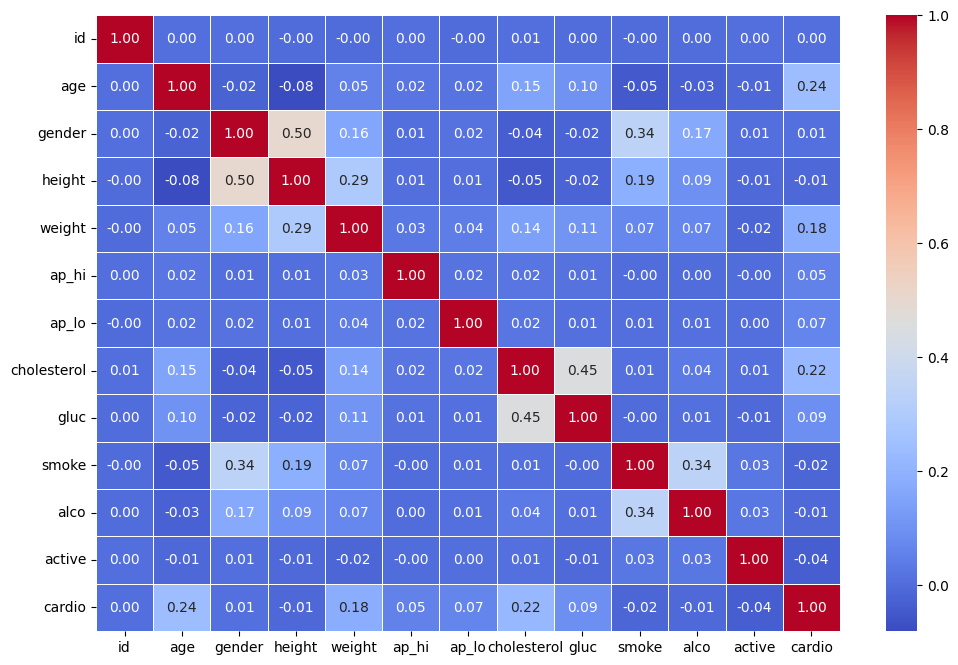

In [20]:
cm = cvd.colormap(df_copy)

Heatmapen presenterar både väntade och oväntade korrelationer som ger insikter om sambandet mellan olika variabler. Cardio uppvisar förväntade kopplingar till kolesterol, vikt och blodtryck, vilka alla är välkända riskfaktorer för hjärt-kärlsjukdomar. Dessutom framkommer en tydlig korrelation med ålder, vilket ytterligare understryker hur ålder kan spela en betydande roll i risken för hjärt-kärlrelaterade problem.

HEIGHT visar starka korrelationer med WEIGHT och GENDER. Detta är inte förvånande, eftersom datan tydligt indikerade att män generellt är längre än kvinnor. Dessa samband är i linje med biologiska och statistiska observationer och kan bidra till att förstå mönster kring längd och vikt i olika grupper.

Smoke, å andra sidan, visar vissa intressanta korrelationer med GENDER, ALCO och HEIGHT. Sambandet mellan rökning och kön samt alkoholintag kan reflektera beteendemönster inom olika grupper, vilket kan kräva djupare analys för att identifiera underliggande orsaker. Ett visst samband med HEIGHT är mer oväntat.

## Träna modellen

In [ ]:
df1, df2 = df.copy(), df.copy()
#Kategorisk data
X1, y1 = df1.drop(["ap_hi", "ap_lo", "weight", "height", "bmi", "cardio"], axis=1), df1["cardio"]
X1 = pd.get_dummies(X1, columns=["bmi_kategori", "bp_category", "gender"],drop_first=True, dtype=int)

# Kontinuerlig data
X2, y2 = df2.drop(["bmi_kategori", "bp_category", "height", "weight", "cardio"], axis=1), df2["cardio"]
X2 = pd.get_dummies(X2, columns=["gender"], drop_first=True, dtype=int)

Datan delas upp i två separata dataset för att optimera analysen och förbättra resultaten. Det första datasetet innehåller kategorisk data, inklusive kategorier som har skapats för BMI och blodtryck. Dessa kategorier gör det möjligt att identifiera mönster och samband mellan olika grupper, vilket kan underlätta analysen av hur olika faktorer påverkar risker och utfall.

Det andra datasetet består enbart av kontinuerlig data, såsom längd, vikt, kolesterolnivåer och blodtrycksvärden. Kontinuerlig data tillåter en mer detaljerad analys där vi kan undersöka variationer och trender med hög noggrannhet.
Genom att separera datan på detta sätt kan man säkerställa att varje dataset behandlas utifrån dess specifika egenskaper och att de mest relevanta metoderna används för att analysera respektive typ av data. 


------------------------------------------------------------------------------------
Modeller som används är:

Logistic regression som ger goda resultat även på begränad data och är mindre benägen att "overfit". 

RandomForest som är robust ofta ger goda resultat och fungerar väl med kategorisk och kontinuerlig data. Den kostar dock mer än de andra mdellerna. 

KNN som är effektiv med rätt hyperparametrar, med rätt värde på k kan den ge bra resultat men är känslig för skalning.

NaiveBayes är billig och effektiv och fungerar väl med stora som små dataset. GaussianNB är med mest för den kontinuerliga datan.

Voting Classifier som tar alla modeller och röstar för varje rad på datasetet.

Hyperparameter tuning for logistic_regression...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Accuracy for logistic_regression: 0.7152

Hyperparameter tuning for RandomForest...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy for RandomForest: 0.7170

Hyperparameter tuning for KNN...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy for KNN: 0.7016

Hyperparameter tuning for NaiveBayes...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy for NaiveBayes: 0.6853

Evaluating logistic_regression...

Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      4716
           1       0.74      0.63      0.68      4962

    accuracy                           0.70      9678
   macro avg       0.71      0.70      0.70      9678
weighted avg       0.71      0.70      0.70      9678

Unika prediktioner: (array([0, 1], dtype=int64

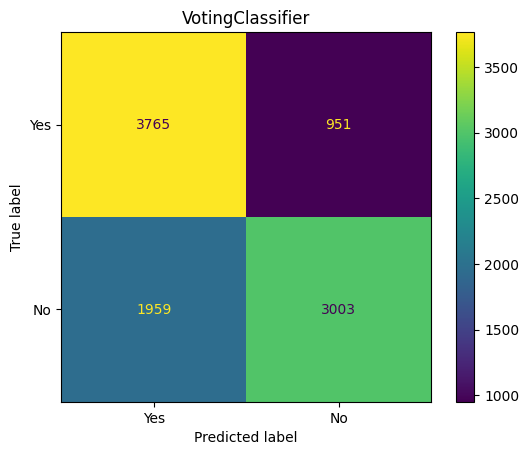

In [23]:
X1_test, y1_test = cvd.data_one(X1, y1, dataset_name="data1")

Hyperparameter tuning for logistic_regression...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Accuracy for logistic_regression: 0.7235

Hyperparameter tuning for RandomForest...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy for RandomForest: 0.7296

Hyperparameter tuning for KNN...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy for KNN: 0.7126

Hyperparameter tuning for NaiveBayes...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy for NaiveBayes: 0.7066

Evaluating logistic_regression...

Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4669
           1       0.77      0.67      0.72      5009

    accuracy                           0.73      9678
   macro avg       0.73      0.73      0.73      9678
weighted avg       0.73      0.73      0.73      9678

Unika prediktioner: (array([0, 1], dtype=int64

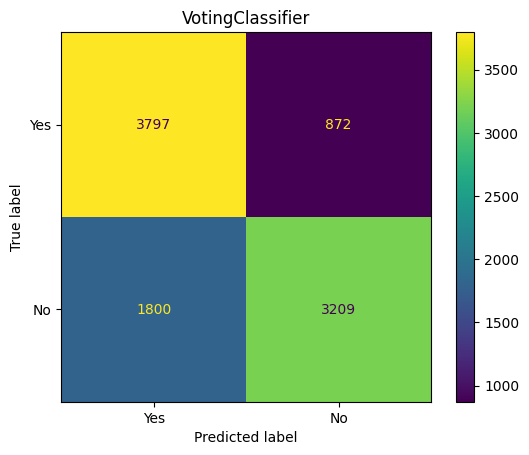

In [ ]:
X2_test, y2_test = cvd.data_one(X2, y2, dataset_name="data2")

In [25]:
cvd.best_models

{'data1': {'logistic_regression': LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                     solver='liblinear'),
  'RandomForest': RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5),
  'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=19),
  'NaiveBayes': GaussianNB(),
  'VotingClassifier': VotingClassifier(estimators=[('lr',
                                LogisticRegression(C=1, class_weight='balanced',
                                                   max_iter=1000,
                                                   solver='liblinear')),
                               ('rfc',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5)),
                               ('knn',
                                KNeighborsClassifier(metric='manhattan',
               

# Resultat

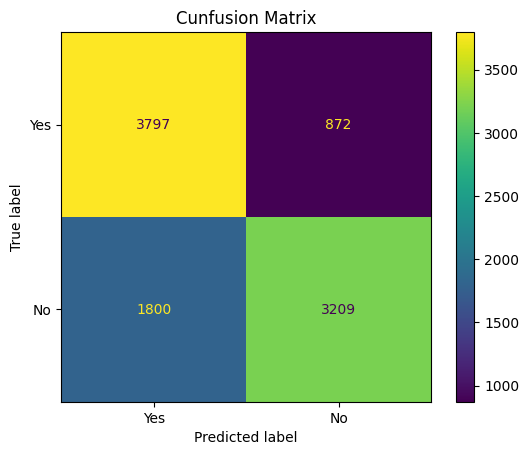

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      4669
           1       0.79      0.64      0.71      5009

    accuracy                           0.72      9678
   macro avg       0.73      0.73      0.72      9678
weighted avg       0.73      0.72      0.72      9678



In [29]:
cvd.print_confusion_matrix(X2_test, y2_test, dataset_name="data2", model_name="VotingClassifier")


### Utvärdering
Utvärdering av modellerna med ConclusionMatrix och Classification report visar att RandomForest får högst accuarcy score på det dataset med kontinuerlig data. Den är robust mot brus och outliers eftersom det genomsnittar resultaten från flera träd, vilket minskar påverkan av extrema värden. Trots detta presterar VotingClassifier generellt bättre på recall för dataset 2, med ett värde runt 80 %. I detta specifika fall kan en hög recall väga tyngre, eftersom den har potentialen att identifiera fler fall och därmed rädda liv.

Modellerna presterar dock överlag ganska snarlikt, även om resultaten kan variera från träning till träning. Denna variation kan bero på slumpmässighet i uppdelningen av tränings- och testdata vid varje körning eller otillräcklig hyperparameteroptimering för modellerna 

Det är troligt att datasetet har hög varians vilket också påverkar det varierande resultatet. Kanske hade resultatet vart bättre om modellerna och dess hyperparametrar vart optimerade för enbart kategorisk eller kontinuerlig data. Det är möjligt att datan innehåller features som inte bidrar till bättre resultat med stor varians eller inte alls är relevant för att se hjärt-kärlsjukdomar. Detta är något som kan undersökas vidare. 